# Rainfall Prediction - Austin Weather Dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as sk
from sklearn.linear_model import LinearRegression
import sklearn.metrics as skm

# Load data

In [21]:
df = pd.read_csv('austin_weather.csv')
df.replace({'T':0, '-':np.nan}, inplace=True)
df.dropna(inplace=True)
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,0,


In [22]:
cols = ['TempHighF','TempLowF','DewPointAvgF','HumidityAvgPercent','SeaLevelPressureAvgInches','VisibilityAvgMiles','WindAvgMPH','PrecipitationSumInches']
df[cols] = df[cols].astype(float)


# Features and target

In [23]:
X = df[['TempHighF','TempLowF','DewPointAvgF','HumidityAvgPercent','SeaLevelPressureAvgInches','VisibilityAvgMiles','WindAvgMPH']]
y = df['PrecipitationSumInches']


# Train/test split


In [24]:
X_train, X_test, y_train, y_test = sk.train_test_split(X, y, test_size=0.2, random_state=42)

# Model

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation

In [26]:
print('MSE:', skm.mean_squared_error(y_test, y_pred))
print('R2:', skm.r2_score(y_test, y_pred))

MSE: 0.06965934122449034
R2: 0.22377015250432053


# Plots


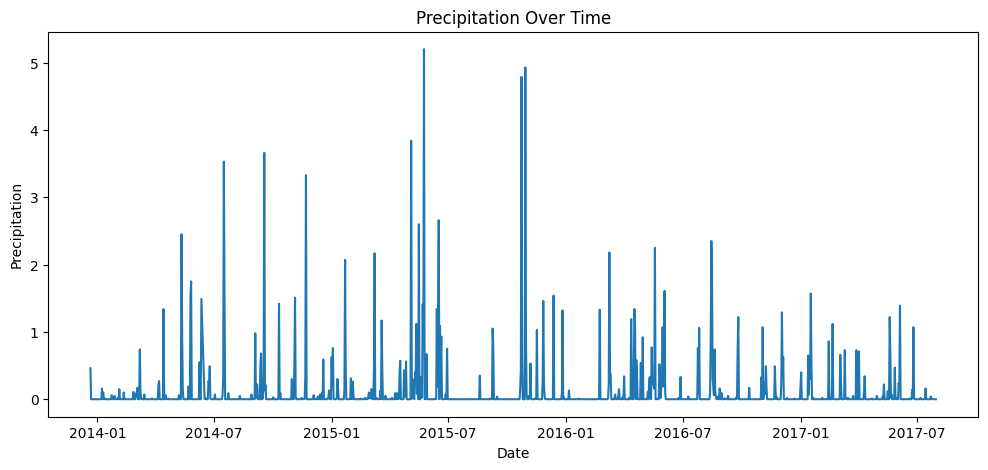

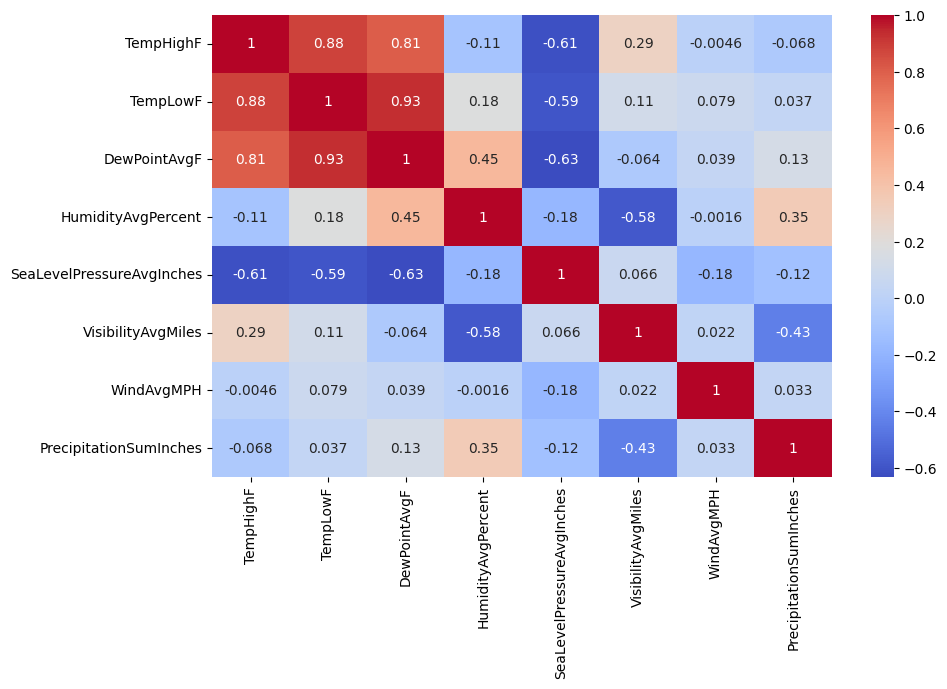

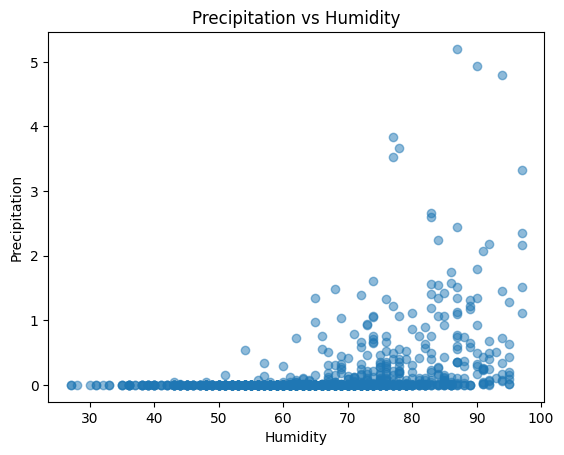

In [27]:
plt.figure(figsize=(12,5))
plt.plot(pd.to_datetime(df['Date']), df['PrecipitationSumInches'])
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.show()

plt.scatter(df['HumidityAvgPercent'], df['PrecipitationSumInches'], alpha=0.5)
plt.title('Precipitation vs Humidity')
plt.xlabel('Humidity')
plt.ylabel('Precipitation')
plt.show()

# Coefficients


In [28]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coef_df.sort_values(by='Coefficient', key=abs, ascending=False))

                     Feature  Coefficient
4  SeaLevelPressureAvgInches    -0.136381
5         VisibilityAvgMiles    -0.114132
3         HumidityAvgPercent     0.007746
2               DewPointAvgF    -0.007096
6                 WindAvgMPH     0.005272
0                  TempHighF     0.003788
1                   TempLowF     0.003770
